In [2]:
pip install autogen


  Using cached websockets-14.2-cp312-cp312-win_amd64.whl.metadata (7.0 kB)
   ---------------------------------------- 0.0/607.0 kB ? eta -:--:--
   ---------------------------------------- 607.0/607.0 kB 5.5 MB/s eta 0:00:00
Using cached websockets-14.2-cp312-cp312-win_amd64.whl (164 kB)
   ---------------------------------------- 0.0/894.9 kB ? eta -:--:--
   ---------------------------------------- 894.9/894.9 kB 8.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import autogen
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


Enter the stock ticker symbol:  AAPL


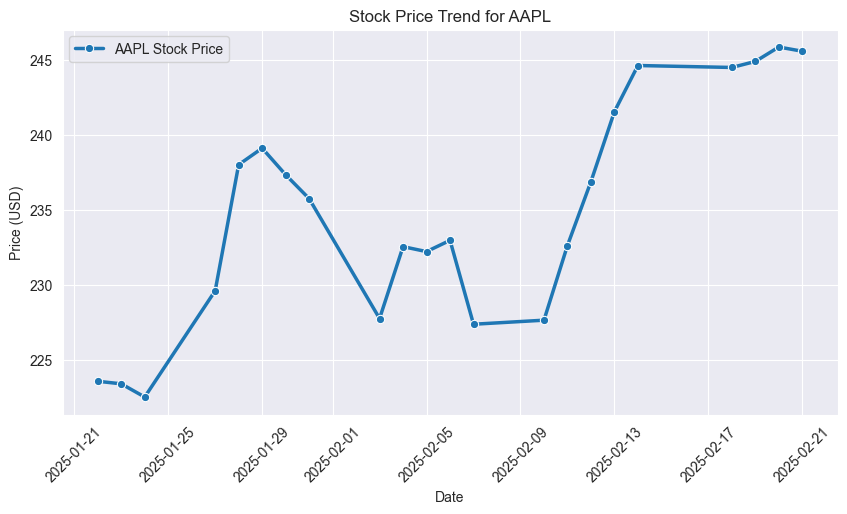

Latest AAPL stock price: $245.55


In [9]:

# Set Seaborn style
sns.set_style("darkgrid")

def fetch_stock_price(ticker):
    """Fetches the latest stock price and historical data for visualization."""
    stock = yf.Ticker(ticker)
    hist = stock.history(period="1mo")  # Fetch past 1-month data
    
    if hist.empty:
        return f"Invalid ticker symbol: {ticker}" 
    
    latest_price = stock.history(period='1d')['Close'].iloc[-1]
    
    # Plot stock price trend
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=hist.index, y=hist['Close'], marker="o", label=f'{ticker} Stock Price', linewidth=2.5)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'Stock Price Trend for {ticker}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    
    return f"Latest {ticker} stock price: ${latest_price:.2f}"

# Define the agent
agent = autogen.AssistantAgent(
    name="StockAgent",
    system_message="I can fetch stock prices and visualize trends. Provide a stock ticker symbol."
)

# Define the user proxy agent
user_proxy = autogen.UserProxyAgent(
    name="User",
    human_input_mode="ALWAYS",
    code_execution_config={"use_docker": False, "work_dir": "./"}
)

# Register the tool
agent.register_function(
    {
        "name": "fetch_stock_price",
        "function": fetch_stock_price,
        "description": "Fetch stock prices and display a trend graph",
    }
)

# Define the conversation logic
def agent_response(message):
    ticker = message.strip().upper()
    response = fetch_stock_price(ticker)
    return response

# Get user input and run the agent
user_message = input("Enter the stock ticker symbol: ")
response = agent_response(user_message)
print(response)